<a href="https://colab.research.google.com/github/Venkatpandey/DataScience_ML/blob/main/featureSelection/06.3-Univariate-Performance-with-Feature-engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Univariate Performance with Feature-engine

This procedure works as follows:

- Train a ML model per every single feature
- Determine the performance of the models
- Select features if model performance is above a certain threshold

In [2]:
pip install feature_engine

     |████████████████████████████████| 205 kB 4.1 MB/s 
     |████████████████████████████████| 9.8 MB 52.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

## Classification

In [4]:
# load dataset
data = pd.read_csv('https://raw.githubusercontent.com/Venkatpandey/DataScience_ML/main/dataset/dataset_2.csv')
data.shape

(50000, 109)

In [5]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,...,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,5.751633,2.808895,1.244055,11.269688,15.866550,0.00,1.181500e+00,1.903910,4.667888,1.842749,5.863767,0.115498,2.398785,0.139191,11.860244,4.433561,7.135750,2.240605,3.720161,5.805012,1.308222,0.133272,5.514540,11.510708,7.534482,8.779925,6.797556,8.504757,0.188741,8.783980,...,12.866988,11.369994,1.467595,10.043070,8.174325,2.088815,0.134455,1.282842,1.262513,1.114369,1.446358,15.512397,1.820403,0.619730,0.826138,6.880270,1.680353,8.659387,10.184313,7.248146,17.065003,0.0,1.044600,0.176036,9.869159,4.662407e-01,7.273476,0.623398,2.070677,1.108609,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,8.225109,2.001220,8.081647,3.933986,14.350374,0.00,1.244384e+01,1.575456,5.275010,2.750981,3.402345,0.227527,2.502344,0.197449,12.654514,3.895271,9.230702,0.719196,3.393035,6.055243,0.926661,0.221227,7.406060,10.290955,8.075000,10.034637,6.182029,7.698029,0.295115,10.308592,...,10.477765,3.026453,1.338741,16.136215,8.659485,0.567717,0.108499,1.447928,0.583342,4.454525,3.570452,15.988817,2.628892,1.251810,2.077105,7.453729,2.173920,10.357143,13.274292,8.647012,17.143991,0.0,1.161626,0.214995,8.661069,9.585002e-01,6.475936,1.230876,2.249656,0.615216,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,8.307318,3.239122,2.699376,10.030416,14.977220,0.00,7.636780e-07,2.605838,5.459521,3.437779,5.498281,19.800000,2.136717,19.036815,11.938497,4.378310,6.843868,1.745698,3.721307,6.339151,1.479797,18.600001,8.142160,12.575593,6.752941,6.303391,5.327748,7.559745,16.951823,7.701432,...,12.795940,3.158102,2.084452,13.596735,7.136616,3.975333,19.199999,1.035094,1.039650,2.920388,18.194969,13.878539,4.177674,0.265892,0.949150,5.501881,1.545747,6.652942,10.219311,7.350044,15.865534,0.0,0.668244,0.207304,9.591838,1.426163e+00,7.552225,0.599195,1.872145,2.111624,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,5.769939,2.760518,4.067190,14.040960,15.363394,0.94,1.278596e+00,2.447368,4.622004,3.166859,5.746444,0.107650,1.819269,0.143555,12.384151,4.847826,8.501440,1.471080,3.349110,6.306657,1.007276,0.134101,4.966871,11.419689,7.254098,9.757191,8.482101,5.228867,0.046546,8.656773,...,13.779983,3.307613,2.003458,14.297207,8.174351,2.670522,0.042879,0.739193,0.419732,2.831101,0.219472,15.418033,3.528015,0.482420,0.934582,6.775936,3.052738,9.836066,9.746183,8.097982,17.479207,0.0,1.027439,0.246158,8.189655,7.226496e-01,7.237598,0.643228,1.168033,1.222773,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,9.297974,1.682118,9.553305,10.341188,9.436362,0.00,1.548740e+01,1.888375,5.975678,1.775326,9.281851,1.350273,3.208565,1.935790,13.324833,1.725549,8.584763,1.643524,4.157284,6.604193,0.677463,1.667245,8.294594,11.017030,5.779013,10.643856,3.344048,4.260534,1.654864,9.104239,...,16.509023,3.350297,1.434873,13.899021,6.759006,3.237689,1.895391,1.314089,0.859594,6.241737,15.391528,1

**Important**

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [6]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [7]:
# set up a machine learning model
rf = RandomForestClassifier(
    n_estimators=10, random_state=1, n_jobs=4)

# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="roc_auc",
    cv=3,
    threshold=0.5)

# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(n_estimators=10,
                                                                  n_jobs=4,
                                                                  random_state=1),
                                 threshold=0.5)

In [8]:
#  the transformer stores a dictionary of feature:metric pairs
# in this case is the roc_auc of each individual model

sel.feature_performance_

{'var_1': 0.4875920361002979,
 'var_10': 0.5039386257974928,
 'var_100': 0.5029860667009475,
 'var_101': 0.501466176599174,
 'var_102': 0.5037100359215322,
 'var_103': 0.4996088538609533,
 'var_104': 0.5038711575296758,
 'var_105': 0.49381293558821265,
 'var_106': 0.5042577009269472,
 'var_107': 0.5030900948409043,
 'var_108': 0.5857684573551475,
 'var_109': 0.500667447955485,
 'var_11': 0.5045230927325406,
 'var_12': 0.50333359269646,
 'var_13': 0.5012587975089644,
 'var_14': 0.5095537975330748,
 'var_15': 0.5066995700865263,
 'var_16': 0.5770565890399896,
 'var_17': 0.4963257939602534,
 'var_18': 0.5023749936101386,
 'var_19': 0.5014541774605149,
 'var_2': 0.5058446601651159,
 'var_20': 0.495197453944737,
 'var_21': 0.5018214387922665,
 'var_22': 0.5030866125728235,
 'var_23': 0.5031379727454716,
 'var_24': 0.4987177779853889,
 'var_25': 0.49717389215534125,
 'var_26': 0.49633518594063686,
 'var_27': 0.49770207516488824,
 'var_28': 0.5066212027234491,
 'var_29': 0.5033061824034428,
 

Text(0, 0.5, 'roc-auc')

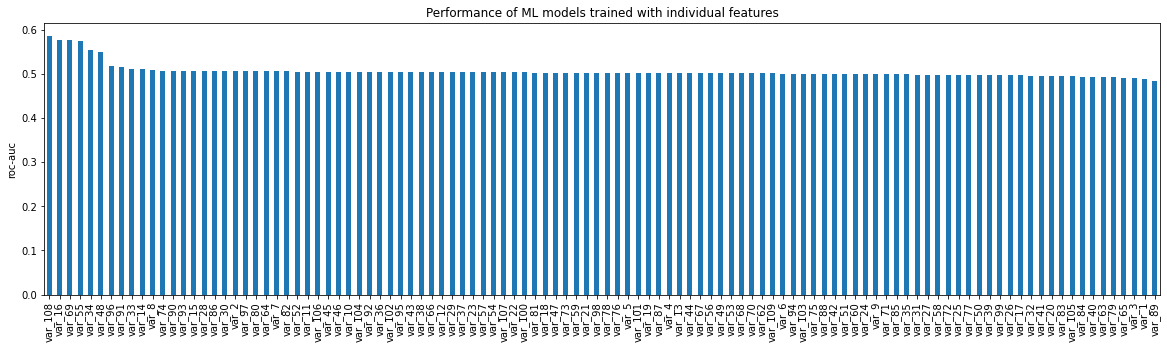

In [9]:
# we can plot feature importance sorted by importance

pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('roc-auc')

In [10]:
# the features that will be removed

len(sel.features_to_drop_)

36

In [11]:
# remove non-prective features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 72), (15000, 72))

## Regression

In [23]:
# load dataset

data = pd.read_csv('https://raw.githubusercontent.com/Venkatpandey/DataScience_ML/main/dataset/houseprice.csv')

data.shape

(1460, 81)

In [24]:
# I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [25]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [26]:
# fill missing values
data.fillna(0, inplace=True)

In [27]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Id','SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [28]:
# set up the machine learning model
rf = RandomForestRegressor(
    n_estimators=10, max_depth=2, random_state=1, n_jobs=4)

# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="r2",
    cv=3,
    threshold=0.4)

# find predictive features
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestRegressor(max_depth=2,
                                                                 n_estimators=10,
                                                                 n_jobs=4,
                                                                 random_state=1),
                                 scoring='r2', threshold=0.4)

In [29]:
# the transformer stores a dictionary of feature:metric pairs
# notice that the r2 can be positive or negative.
# the selector selects based on the absolute value

sel.feature_performance_

{'1stFlrSF': 0.34510202976681503,
 '2ndFlrSF': 0.21988067672483705,
 '3SsnPorch': -0.015983053363372062,
 'BedroomAbvGr': 0.04170276147375148,
 'BsmtFinSF1': 0.19898086671343473,
 'BsmtFinSF2': -0.009703547431066162,
 'BsmtFullBath': 0.03495762648889167,
 'BsmtHalfBath': -0.024767451129236395,
 'BsmtUnfSF': 0.05878832827833491,
 'EnclosedPorch': 0.019683924728311115,
 'Fireplaces': 0.22352442100930417,
 'FullBath': 0.3300942150720977,
 'GarageArea': 0.40288417091771045,
 'GarageCars': 0.47450883716087217,
 'GarageYrBlt': 0.3244535905924391,
 'GrLivArea': 0.4741672051400061,
 'HalfBath': 0.07062920270257245,
 'KitchenAbvGr': 0.0013083175726592937,
 'LotArea': 0.18072827270865235,
 'LotFrontage': 0.1129543796082455,
 'LowQualFinSF': -0.025701997588528275,
 'MSSubClass': 0.1851403460198242,
 'MasVnrArea': 0.1673999965292691,
 'MiscVal': -0.021566858715237225,
 'MoSold': -0.03822068210669283,
 'OpenPorchSF': 0.16437402600235304,
 'OverallCond': 0.10099732436450067,
 'OverallQual': 0.639060

Text(0, 0.5, 'r2')

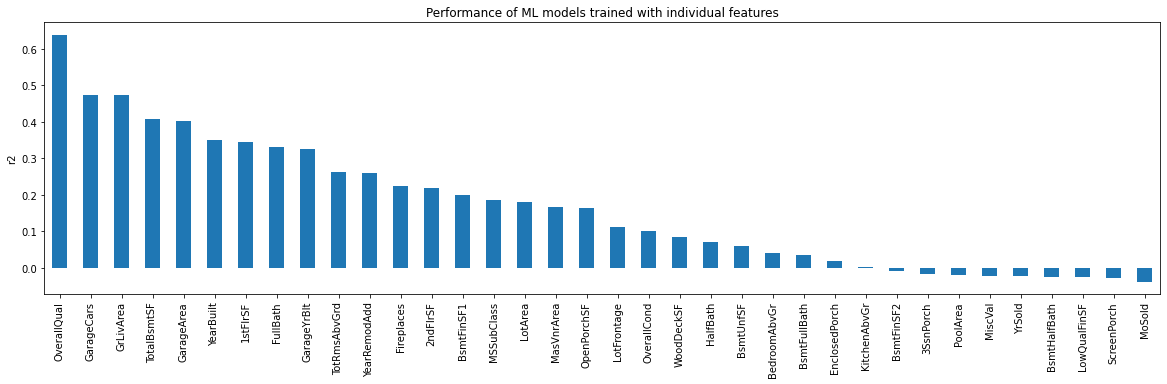

In [30]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('r2')

Text(0, 0.5, 'r2 - absolute value')

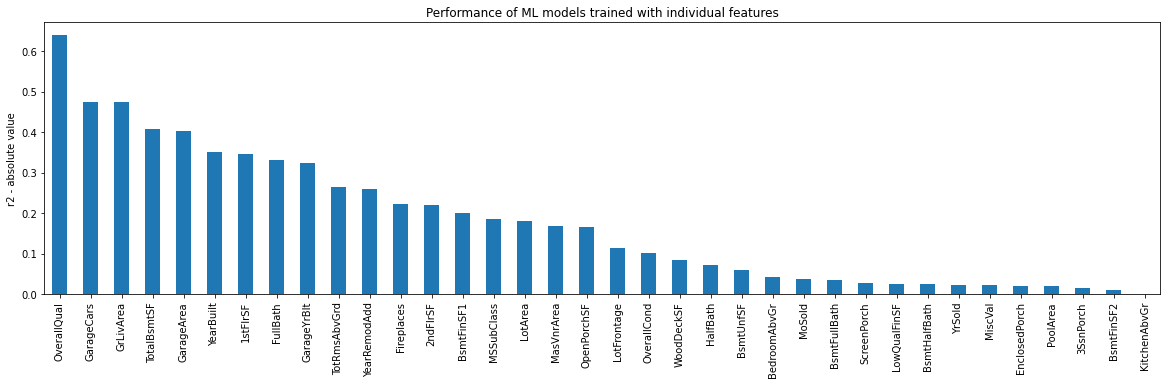

In [31]:
# same plot but taking the absolute value of the r2

np.abs(pd.Series(sel.feature_performance_)).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('r2 - absolute value')

In [32]:
# the features that will be removed

len(sel.features_to_drop_)

31

In [33]:
# select features in the dataframes

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((1022, 5), (438, 5))

**HOMEWORK**

Try selecting features using other metrics instead of the roc_auc and r2. Use for example the accuracy for classification and the neg_mean_squared_error, to become familiar with the use of this selector.